In [1]:
import pandas as pd
import numpy as np
from xml.dom import minidom
from datetime import datetime

### 1. Carga de Datos

In [2]:
import pandas as pd
from xml.dom import minidom

# Leer el archivo XML
library_xml = minidom.parse("./res/rekordbox.xml")
tracks = library_xml.getElementsByTagName("TRACK")

# Crear una lista para almacenar los datos de cada pista
tracks_data = []

# Iterar sobre cada elemento TRACK y crear un diccionario con los datos de interés
for track in tracks:
    track_data = {}
    track_data["id"] = track.getAttribute("TrackID")
    track_data["name"] = track.getAttribute("Name")
    track_data["artist"] = track.getAttribute("Artist")
    track_data["bpm"] = track.getAttribute("AverageBpm")
    track_data["genre"] = track.getAttribute("Genre")    
    track_data["tonality"] = track.getAttribute("Tonality")
    track_data["dateAdd"] = track.getAttribute("DateAdded")
    track_data["album"] = track.getAttribute("Album")
    track_data["label"] = track.getAttribute("Label")
    track_data["comments"] = track.getAttribute("Comments")
    track_data["bitRate"] = track.getAttribute("BitRate")
    track_data["size"] = track.getAttribute("Size")
    track_data["colour"] = track.getAttribute("Colour")
    track_data["playCount"] = track.getAttribute("PlayCount")
    track_data["location"] = track.getAttribute("Location")
    tracks_data.append(track_data)

# Crear el dataframe de Pandas a partir de la lista de diccionarios
library = pd.DataFrame(tracks_data)


In [3]:
from datetime import datetime

#bpm to number
library['bpm']=pd.to_numeric(library['bpm'], errors='coerce').fillna(0).astype(int)
#convert to date field
format='%Y-%m-%d'
library['dateAdd'] = pd.to_datetime(library['dateAdd'], format=format)

In [4]:
display(library.head())

,id,name,artist,bpm,genre,tonality,dateAdd,album,label,comments,bitRate,size,colour,playCount,location
0,1,Ubi,"Mia Mendi, Thomas Gandey",121,Melodic House & Techno,Em,2022-09-07,Ubi EP,Watergate Records,,320,16845301,,3,file://localhost/C:/E+/22T09_Septiembre2/Mia%2...
1,2,Mortero,Yudi Watanabe,120,Progressive House,Fm,2022-09-07,Mortero,Transensations Records,,320,18463577,,1,file://localhost/C:/E+/22T09_Septiembre2/Yudi%...
2,3,Pacifica (Capoon Remix),Beije-,123,Organic House / Downtempo,Em,2022-09-07,Pacifica,Saturn Return,,320,21693662,,1,file://localhost/C:/E+/22T09_Septiembre2/Beije...
3,4,Away (Original Mix),Losless,123,Melodic House & Techno,Bm,2022-09-07,Second Life,Oddity Records,,320,17924148,,2,file://localhost/C:/E+/22T09_Septiembre2/Losle...
4,5,Barbak,Olivier Giacomotto,123,Indie Dance,Em,2022-09-07,Barbak EP,Eleatics Records,,320,16532014,,2,file://localhost/C:/E+/22T09_Septiembre2/Olivi...


#### 1.1 Cambio de tonalidad a clave camelot

In [5]:
#library['tonality'].unique()

#Camelot Key and tonality equivalence dictionary definition
dic_key_tonality = {'Abm':'1A' ,'B' :'1B',
                    'Ebm':'2A' ,'Gb':'2B',
                    'Bbm':'3A' ,'Db':'3B',
                    'Fm' :'4A' ,'Ab':'4B',
                    'Cm' :'5A' ,'Eb':'5B',
                    'Gm' :'6A' ,'Bb':'6B',
                    'Dm' :'7A' ,'F' :'7B',
                    'Am' :'8A' ,'C' :'8B',
                    'Em' :'9A' ,'G' :'9B',
                    'Bm' :'10A','D' :'10B',
                    'Gbm':'11A','A' :'11B',
                    'Dbm':'12A','E' :'12B'
                    ,'':''}

#Lambda definition
get_key = lambda x: dic_key_tonality[x]
#print(get_key('E'))

In [6]:
#New column camleto key 
library['key']= library['tonality'].apply(get_key)
library['key'].unique()

array(['9A', '4A', '10A', '2A', '1A', '6A', '5A', '7A', '11A', '8A', '',
       '3A', '6B', '12A', '4B', '1B', '9B', '2B', '5B', '7B', '8B', '12B',
       '11B', '3B', '10B'], dtype=object)

In [7]:
library['genre'].unique()

library.groupby("genre").agg({"id": pd.Series.nunique}).sort_values(by="id", ascending=False)

,id
genre,
Progressive House,1000
Melodic House & Techno,549
,150
Techno (Peak Time / Driving),145
Organic House / Downtempo,109
Other,95
Trance,92
Tech House,47
House,29


In [8]:
display(library.head())

,id,name,artist,bpm,genre,tonality,dateAdd,album,label,comments,bitRate,size,colour,playCount,location,key
0,1,Ubi,"Mia Mendi, Thomas Gandey",121,Melodic House & Techno,Em,2022-09-07,Ubi EP,Watergate Records,,320,16845301,,3,file://localhost/C:/E+/22T09_Septiembre2/Mia%2...,9A
1,2,Mortero,Yudi Watanabe,120,Progressive House,Fm,2022-09-07,Mortero,Transensations Records,,320,18463577,,1,file://localhost/C:/E+/22T09_Septiembre2/Yudi%...,4A
2,3,Pacifica (Capoon Remix),Beije-,123,Organic House / Downtempo,Em,2022-09-07,Pacifica,Saturn Return,,320,21693662,,1,file://localhost/C:/E+/22T09_Septiembre2/Beije...,9A
3,4,Away (Original Mix),Losless,123,Melodic House & Techno,Bm,2022-09-07,Second Life,Oddity Records,,320,17924148,,2,file://localhost/C:/E+/22T09_Septiembre2/Losle...,10A
4,5,Barbak,Olivier Giacomotto,123,Indie Dance,Em,2022-09-07,Barbak EP,Eleatics Records,,320,16532014,,2,file://localhost/C:/E+/22T09_Septiembre2/Olivi...,9A


In [9]:
display(library.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         8544 non-null   object        
 1   name       8544 non-null   object        
 2   artist     8544 non-null   object        
 3   bpm        8544 non-null   int32         
 4   genre      8544 non-null   object        
 5   tonality   8544 non-null   object        
 6   dateAdd    2455 non-null   datetime64[ns]
 7   album      8544 non-null   object        
 8   label      8544 non-null   object        
 9   comments   8544 non-null   object        
 10  bitRate    8544 non-null   object        
 11  size       8544 non-null   object        
 12  colour     8544 non-null   object        
 13  playCount  8544 non-null   object        
 14  location   8544 non-null   object        
 15  key        8544 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(14)

None

## 2. Grafo Camelot Key


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import graphviz as gv
import pygraphviz

from networkx.algorithms.simple_paths import all_simple_paths
from datetime import datetime

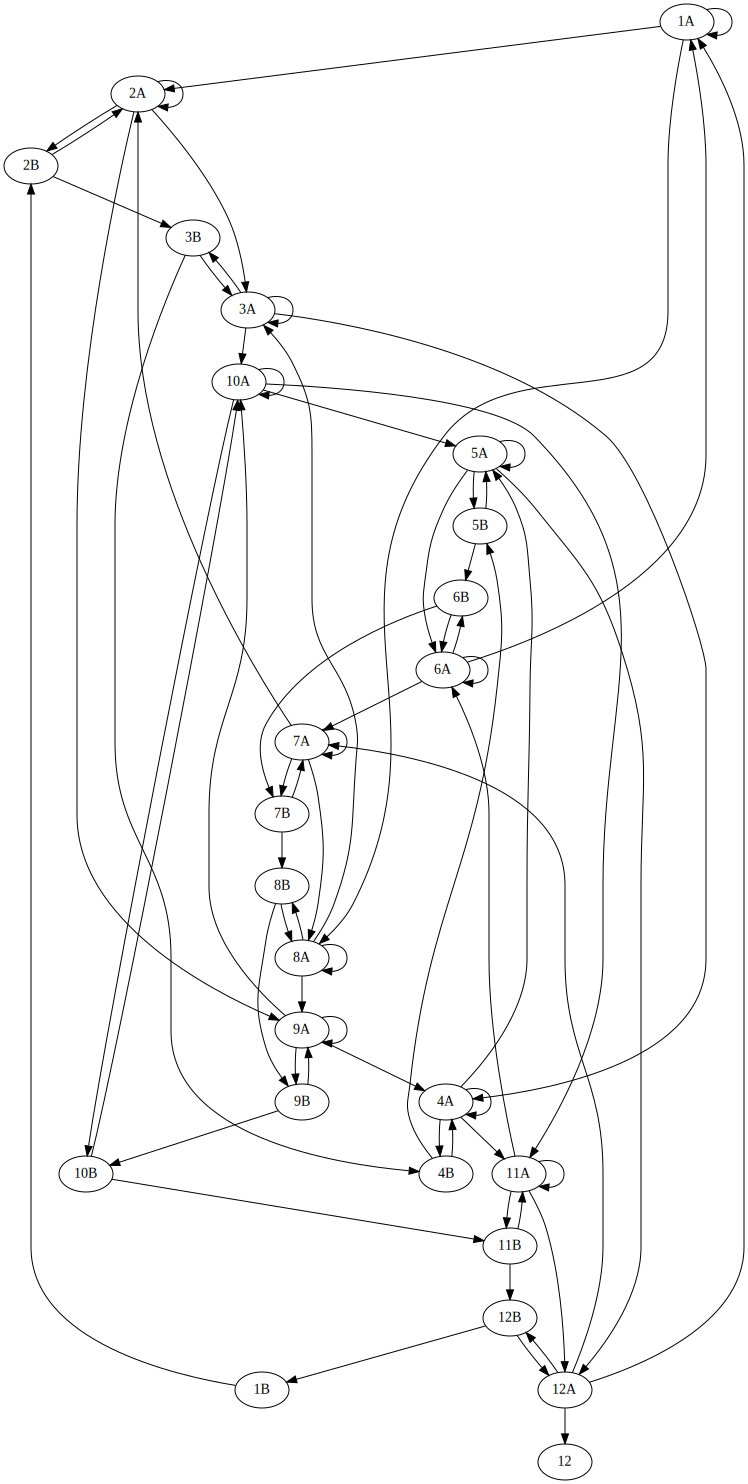

In [12]:
# Create graph
G = nx.DiGraph()

# Create nodes 
nodos=[]
for i in range (1,13):
    nodos.append(str(i)+"A")
    nodos.append(str(i)+"B")

# Add nodes to graph
G.add_nodes_from(nodos)

# Add edges with weight
W_SAME_NOTE        = 4
W_NEXT_NOTE_MI     = 4
W_NEXT_NOTE_MA     = 2
W_NEXT_NOTE_MI_MA  = 2
W_NEXT_NOTE_MA_MI  = 5
W_NEXT_NOTE_EMERGY = 3

#same note
G.add_weighted_edges_from([ ("1A", "1A",W_SAME_NOTE),
                            ("2A", "2A",W_SAME_NOTE),
                            ("3A", "3A",W_SAME_NOTE),
                            ("4A", "4A",W_SAME_NOTE),
                            ("5A", "5A",W_SAME_NOTE),
                            ("6A", "6A",W_SAME_NOTE),
                            ("7A", "7A",W_SAME_NOTE),
                            ("8A", "8A",W_SAME_NOTE),
                            ("9A", "9A",W_SAME_NOTE),
                            ("10A", "10A",W_SAME_NOTE),
                            ("11A", "11A",W_SAME_NOTE),
                            ("12A", "12",W_SAME_NOTE)])

#minor notes
G.add_weighted_edges_from([ ("1A", "2A",W_NEXT_NOTE_MI),
                            ("2A", "3A",W_NEXT_NOTE_MI),
                            ("3A", "4A",W_NEXT_NOTE_MI),
                            ("4A", "5A",W_NEXT_NOTE_MI),
                            ("5A", "6A",W_NEXT_NOTE_MI),
                            ("6A", "7A",W_NEXT_NOTE_MI),
                            ("7A", "8A",W_NEXT_NOTE_MI),
                            ("8A", "9A",W_NEXT_NOTE_MI),
                            ("9A", "10A",W_NEXT_NOTE_MI),
                            ("10A", "11A",W_NEXT_NOTE_MI),
                            ("11A", "12A",W_NEXT_NOTE_MI),
                            ("12A", "1A",W_NEXT_NOTE_MI)])

#major notes
G.add_weighted_edges_from([ ("1B", "2B",W_NEXT_NOTE_MA),
                            ("2B", "3B",W_NEXT_NOTE_MA),
                            ("3B", "4B",W_NEXT_NOTE_MA),
                            ("4B", "5B",W_NEXT_NOTE_MA),
                            ("5B", "6B",W_NEXT_NOTE_MA),
                            ("6B", "7B",W_NEXT_NOTE_MA),
                            ("7B", "8B",W_NEXT_NOTE_MA),
                            ("8B", "9B",W_NEXT_NOTE_MA),
                            ("9B", "10B",W_NEXT_NOTE_MA),
                            ("10B", "11B",W_NEXT_NOTE_MA),
                            ("11B", "12B",W_NEXT_NOTE_MA),
                            ("12B", "1B",W_NEXT_NOTE_MA)])

#minior to major
G.add_weighted_edges_from([("2A", "2B",W_NEXT_NOTE_MI_MA),
                            ("3A", "3B",W_NEXT_NOTE_MI_MA),
                            ("4A", "4B",W_NEXT_NOTE_MI_MA),
                            ("5A", "5B",W_NEXT_NOTE_MI_MA),
                            ("6A", "6B",W_NEXT_NOTE_MI_MA),
                            ("7A", "7B",W_NEXT_NOTE_MI_MA),
                            ("8A", "8B",W_NEXT_NOTE_MI_MA),
                            ("9A", "9B",W_NEXT_NOTE_MI_MA),
                            ("10A", "10B",W_NEXT_NOTE_MI_MA),
                            ("11A", "11B",W_NEXT_NOTE_MI_MA),
                            ("12A", "12B",W_NEXT_NOTE_MI_MA)])

#major to minior
G.add_weighted_edges_from([("2B", "2A",W_NEXT_NOTE_MA_MI),
                            ("3B", "3A",W_NEXT_NOTE_MA_MI),
                            ("4B", "4A",W_NEXT_NOTE_MA_MI),
                            ("5B", "5A",W_NEXT_NOTE_MA_MI),
                            ("6B", "6A",W_NEXT_NOTE_MA_MI),
                            ("7B", "7A",W_NEXT_NOTE_MA_MI),
                            ("8B", "8A",W_NEXT_NOTE_MA_MI),
                            ("9B", "9A",W_NEXT_NOTE_MA_MI),
                            ("10B", "10A",W_NEXT_NOTE_MA_MI),
                            ("11B", "11A",W_NEXT_NOTE_MA_MI),
                            ("12B", "12A",W_NEXT_NOTE_MA_MI)])

#jump to more energy
G.add_weighted_edges_from([ ("1A", "8A",W_NEXT_NOTE_EMERGY),
                            ("2A", "9A",W_NEXT_NOTE_EMERGY),
                            ("3A", "10A",W_NEXT_NOTE_EMERGY),
                            ("4A", "11A",W_NEXT_NOTE_EMERGY),
                            ("5A", "12A",W_NEXT_NOTE_EMERGY),
                            ("6A", "1A",W_NEXT_NOTE_EMERGY),
                            ("7A", "2A",W_NEXT_NOTE_EMERGY),
                            ("8A", "3A",W_NEXT_NOTE_EMERGY),
                            ("9A", "4A",W_NEXT_NOTE_EMERGY),
                            ("10A", "5A",W_NEXT_NOTE_EMERGY),
                            ("11A", "6A",W_NEXT_NOTE_EMERGY),
                            ("12A", "7A",W_NEXT_NOTE_EMERGY)])

#print(G.nodes(data=True))
#Display graph
A = nx.nx_agraph.to_agraph(G)
A.layout('dot')
gv.Source(A.to_string())

#### 2.1 Sucesores validos

In [19]:
def getSucesor(G, key):
    successors = list(G.successors(key))    
    d = pd.DataFrame(columns=['key','weight'])
    #d = d.append({'key':key,'weight': same_key_prob}, ignore_index=True)
    
    for node in successors:
        edge_data = G.get_edge_data(key, node)
        weight = edge_data["weight"]        
        d=d.append({'key':node,'weight': weight}, ignore_index=True)

    d=d.sort_values(by='weight', ascending=False)
    #Probability
    d['prob']=d["weight"] / np.sum(d["weight"])
    return d
    

In [14]:
def getKeyBtw(G, key1, key2):
    successors = nx.shortest_path(G, key1, key2)    
    d = pd.DataFrame(columns=['key','weight'])
    
    for node in successors:
        edge_data = G.get_edge_data(key1, node)
        if edge_data is not None:
            weight = edge_data["weight"]       
            d=d.append({'key':node,'weight': weight}, ignore_index=True)

    d=d.sort_values(by='weight', ascending=False)
    #sum_weight=
    d['prob']=d["weight"] / np.sum(d["weight"])
    return d


In [18]:
key = "8A"
successors = getSucesor(G, key)

display(successors)

#extract ramdom key from succerssor
selected_key = np.random.choice(successors['key'], p=successors['prob'])
print("Key aleatorio: " +selected_key)


AttributeError: 'DataFrame' object has no attribute 'append'

In [17]:
sum(successors['prob'])

1.0

# 3. Creación play list

In [31]:
#Search song

def get_id_song_by_name(library, title):

   return library[library['name'].str.contains(title)]


In [32]:
print(get_id_song_by_name(library=library, title='Bruta'))

        id       name     artist  bpm                   genre tonality  \
1945  1946  Brutalism  Woo York-   93  Melodic House & Techno       Dm   

        dateAdd        album              label          comments bitRate  \
1945 2022-09-17  Unity Pt. 3  Afterlife Records  Estilo. Comienzo     320   

          size    colour playCount  \
1945  15586005  0xff007f         2   

                                               location key  
1945  file://localhost/C:/E+/01-MinusTechMelody/03-A...  7A  


In [33]:
min_date_add = str("2023-01-01")
filter = f"  dateAdd >= '{str(min_date_add)}'"

#filter = "  dateAdd >=  " +min_date_add 
library.query( filter)

,id,name,artist,bpm,genre,tonality,dateAdd,album,label,comments,bitRate,size,colour,playCount,location,key
2270,2271,Shadow (Paul Thomas Extended Remix),Aly and Fila vs. Scott Bond and Charlie Walker,122,Trance,Am,2023-03-10,Shadow (Paul Thomas Remix),UV,,320,21640230,0xff007f,7,file://localhost/C:/E+/02-DonwloadsAll/202303_...,8A
2271,2272,Nibbana (Volen Sentir's Pink Sky Extended Reto...,PROFF,122,Organic House / Downtempo,Em,2023-01-28,Nibbana - Volen Sentir's Pink Sky Extended Ret...,Monstercat,,320,21673447,,2,file://localhost/C:/E+/02-DonwloadsAll/202301_...,9A
2272,2273,Phantom,Dylhen,122,Progressive House,Fm,2023-03-10,"Nothing But... Progressive Vibes, Vol. 07",Nothing But,,320,18200289,0xff0000,3,file://localhost/C:/E+/02-DonwloadsAll/202303_...,4A
2273,2274,Miracles,Nuera,124,Progressive House,Cm,2023-03-10,,,,320,16995898,0xffa500,5,file://localhost/C:/E+/02-DonwloadsAll/202303_...,5A
2274,2275,Nothing From Us (Extended Mix),Sean & Dee -,124,Progressive House,Bbm,2023-03-10,Nothing From Us,UV Noir,,320,17875246,,3,file://localhost/C:/E+/02-DonwloadsAll/202303_...,3A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,2451,About You (Extended Mix),Alberto Hernandez (MX),122,Progressive House,Em,2023-03-29,About You,Songuara,,320,16644400,0xffa500,1,file://localhost/C:/E+/02-DonwloadsAll/202303_...,9A
2451,2452,Last Tree Standing (Original Mix),Sean & Dee,124,Techno,Em,2023-03-28,The Ascension,ICONYC,,320,16375112,,3,file://localhost/C:/E+/02-DonwloadsAll/202303_...,9A
2452,2453,Disappear (Gorge & Nick Curly Remix),"Yulia Niko, Mery Kilic",124,Tech House,Em,2023-03-29,Unique Underground Vol. 21,Recovery Tech,,320,16264573,,,file://localhost/C:/E+/02-DonwloadsAll/202303_...,9A
2453,2454,Running (Extended Mix),Anyma feat. Meg Myers,125,Melodic House & Techno,Bm,2023-03-28,,Afterlife Records,,320,15457021,,1,file://localhost/C:/E+/02-DonwloadsAll/202303_...,10A


In [34]:
library.query(" id == '2277'")

,id,name,artist,bpm,genre,tonality,dateAdd,album,label,comments,bitRate,size,colour,playCount,location,key
2276,2277,Ally Of The Good (Extended Mix),Daniel Portman,124,Melodic House & Techno,Fm,2023-03-10,Ally of the Good,Enormous Tunes,,320,15692388,0xff0000,3,file://localhost/C:/E+/02-DonwloadsAll/202303_...,4A


In [35]:
# first song

def get_fist_song(library,key='8A',bpm_max=122, genres=None, labels=None):
    #beging 8A
    filter = f" key == '{key}' and bpm < {bpm_max}"
    first_song=library.query(filter).sample(n=1)
    return first_song

In [36]:

# get son
def get_song(library, successors, bpm_max, genres=None, labels=None, min_date_add=None, burnSongs=None):

    song,i=None,0
    #Select Key
    key = np.random.choice(successors['key'], p=successors['prob'])
    while i<10:  

        #Query BPM      
        filter = f" key == '{key}' and bpm < {bpm_max} "         
        #Query genres
        if genres is not None: filter += f" and genre in {genres} "
        #Query labels
        if labels is not None: filter += f" and label in {labels} "
        #filter date add
        if min_date_add is not None: filter += f" and dateAdd >= '{str(min_date_add)}' "
        #songs already selected
        if burnSongs is not None: filter += f" and id not in {burnSongs} "
       
        if(len(library.query(filter))>0):
            #Query labels            
            song=library.query(filter).sample(n=1)
            #when add son
            if song is not None: break

        else:
            print("NO SONG: ", filter)
            #delete the key and search other key
            successors = successors.drop(index=successors[successors['key'] == key].index)
            successors['prob']=successors["weight"] / np.sum(successors["weight"])
            key = np.random.choice(successors['key'], p=successors['prob'])
            
            i+=1      
    
    return song

In [37]:
def change_song(playlist, id, max_bpm_song=None, genres=None, labels=None, min_date_add=None):

    playlist=playlist.copy()
    #Get key before
    key1=playlist['key'].loc[id-1]
    #Get key after
    key2=playlist['key'].loc[id+1]
    #get sucesor
    successors=getKeyBtw(G, key1 , key2)
    display(successors)

    song = get_song(library, successors, max_bpm_song, genres=genres, labels=labels, min_date_add=min_date_add, burnSongs=playlist["id"].tolist())
    if song is not None:
        id2=song.index[0]
        for col in song:
            #print(col)
            #print(song[col].loc[id2] )
            playlist[col].loc[id]=song[col].loc[id2]       
        
    return(playlist)


In [38]:
def get_play_list(n, max_init_bpm=122, max_bpm_list=125, genres=None, labels=None, min_date_add=None, first_song_id=None):

    #Create dummy playlist
    playlist=pd.DataFrame([])
    #Set bpm_max
    max_bpm_song=max_init_bpm
    #get first song
    first_song=None
    #Validate id first song
    if first_song_id is not None:
        first_song=library.query(f" id == '{first_song_id}' ")
    
    if first_song is None:
        first_song = get_fist_song(library)
        
    playlist = playlist.append(first_song)
    #Get key first song
    key_last = playlist['key'].iloc[-1]
    #Set maxifier bpm variable
    plusbpm=0;

    for i in range (1,n):     
        
        #get sucesor
        successors = getSucesor(G, key_last)
        #Get song
        song = get_song(library, successors, max_bpm_song, genres=genres, labels=labels, min_date_add=min_date_add, burnSongs=playlist["id"].tolist())
        
        #if song is none then change key        
        if song is None:
            key_last = str(int(key_last[0])+5)+key_last[1]

        #add song
        else:            
            #Add song
            playlist = playlist.append(song)
            #get lastkey
            key_last = playlist['key'].iloc[-1]
            #plus bpm
            plusbpm+=1
            #plus bpm each 5
            if plusbpm%5==0 and max_bpm_song < max_bpm_list:
                max_bpm_song+=1                   
    
    return(playlist.reset_index())
    

In [20]:
getKeyBtw(G, "8A", "9A")

AttributeError: 'DataFrame' object has no attribute 'append'

### Examples

In [39]:
## Generarte playlist

#Genres
genres=['Progressive House','Melodic House & Techno']
#Labels
labels = None
#min date add
min_date_add="2023-01-01"
#firstsong  - La primera canción que quiero es: Woo York Brutalism que el id es 1946
first_song_id=1946

#Create playlist
playlist= get_play_list(10, genres=genres, labels=labels, first_song_id=first_song_id,min_date_add=min_date_add)
#Display playlist
display(playlist.loc[:,['id','artist','name','bpm','key','genre','label']])

#Save PL
#currentTime = datetime.now().strftime("%Y-%m-%d_%H%M%S")
#playlist.to_csv(f'./playlists/playlist{currentTime}.csv', sep=';', index = True)




NO SONG:   key == '8A' and bpm < 122  and genre in ['Progressive House', 'Melodic House & Techno']  and dateAdd >= '2023-01-01'  and id not in ['1946', '2291'] 
NO SONG:   key == '5B' and bpm < 123  and genre in ['Progressive House', 'Melodic House & Techno']  and dateAdd >= '2023-01-01'  and id not in ['1946', '2291', '2428', '2427', '2423', '2438', '2347'] 


,id,artist,name,bpm,key,genre,label
0,1946,Woo York-,Brutalism,93,7A,Melodic House & Techno,Afterlife Records
1,2291,The Wash,Thick Skin (Original Mix),120,8A,Progressive House,Mango Alley
2,2428,"Ric Niels, Dowden -",Spiral,121,3A,Progressive House,Mango Alley
3,2427,"Ric Niels, Dowden -",Spiral (GMJ Remix),121,4A,Progressive House,Mango Alley
4,2423,"Dowden, Ric Niels -",Coil,121,4A,Progressive House,Mango Alley
5,2438,Souto & Nehli,Path To The Unknown (Original Mix),118,4A,Progressive House,WORDS NOT ENOUGH
6,2347,Paul Thomas,Lorax,122,5A,Progressive House,UV
7,2440,Konte,Into the Ashes,122,6A,Progressive House,Future Avenue
8,2354,Tebra,Motif,121,6A,Melodic House & Techno,Go Deeva Records
9,2444,Luis Damora,A Better Way,122,7A,Progressive House,


In [50]:

#Generos
genres=['Progressive House','Melodic House & Techno']
#Labels
labels = None
#min date add
min_date_add="2023-01-01"

#Create playlist
playlist= get_play_list(17, genres=genres, labels=labels, first_song_id=2277,min_date_add=min_date_add)
#Display playlist
display(playlist.loc[:,['id','artist','name','bpm','key','genre','label']])

#Save PL
#currentTime = datetime.now().strftime("%Y-%m-%d_%H%M%S")
#playlist.to_csv(f'./playlists/playlist{currentTime}.csv', sep=';', index = True)



NO SONG:   key == '11A' and bpm < 122  and genre in ['Progressive House', 'Melodic House & Techno']  and dateAdd >= '2023-01-01'  and id not in ['2277'] 
NO SONG:   key == '11A' and bpm < 122  and genre in ['Progressive House', 'Melodic House & Techno']  and dateAdd >= '2023-01-01'  and id not in ['2277', '2427'] 
NO SONG:   key == '4B' and bpm < 122  and genre in ['Progressive House', 'Melodic House & Techno']  and dateAdd >= '2023-01-01'  and id not in ['2277', '2427'] 
NO SONG:   key == '4B' and bpm < 122  and genre in ['Progressive House', 'Melodic House & Techno']  and dateAdd >= '2023-01-01'  and id not in ['2277', '2427', '2438', '2435', '2436'] 
NO SONG:   key == '11A' and bpm < 123  and genre in ['Progressive House', 'Melodic House & Techno']  and dateAdd >= '2023-01-01'  and id not in ['2277', '2427', '2438', '2435', '2436', '2383', '2381'] 
NO SONG:   key == '12A' and bpm < 123  and genre in ['Progressive House', 'Melodic House & Techno']  and dateAdd >= '2023-01-01'  and id

,id,artist,name,bpm,key,genre,label
0,2277,Daniel Portman,Ally Of The Good (Extended Mix),124,4A,Melodic House & Techno,Enormous Tunes
1,2427,"Ric Niels, Dowden -",Spiral (GMJ Remix),121,4A,Progressive House,Mango Alley
2,2438,Souto & Nehli,Path To The Unknown (Original Mix),118,4A,Progressive House,WORDS NOT ENOUGH
3,2435,Kyotto,Sweet Escape (Alan Cerra Remix),121,4A,Progressive House,Dopamine White
4,2436,SALAZAR (COL),Gaman (Jhordan Welsch Remix),120,4A,Progressive House,Wander Nation
5,2383,Ben Tov-,Theragon (Lukas Bilz Remix),120,4A,Melodic House & Techno,Katz & Kauz
6,2381,Alper Gursoy-,A Story,122,4A,Melodic House & Techno,The Sin Records
7,2346,Paul Thomas,Lorax (Stan Kolev Extended Remix),121,5A,Progressive House,UV
8,2347,Paul Thomas,Lorax,122,5A,Progressive House,UV
9,2288,Roman Kandel -,Mahasim Dmitry Molosh Remix,122,6A,Progressive House,Deepwibe Underground


In [9]:
table = 'payers'
cols = "col1, col2, col3"

query = "INSERT INTO %s(%s) VALUES %%s on conflict(%s) do update set(%s) = %%s" % (table, cols, 'email',cols)

print(query)

INSERT INTO payers(col1, col2, col3) VALUES %s on conflict(email) do update set(col1, col2, col3) = %s


In [51]:
min_date_add="2022-06-01"

new_playlist= change_song(playlist, 2,  max_bpm_song=124, genres=genres, min_date_add=min_date_add, labels=None)
display(new_playlist.loc[:,['id','artist','name','bpm','key','genre','label']])

,key,weight,prob
0,4A,4,1.0


c:\Users\acasa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,artist,name,bpm,key,genre,label
0,2277,Daniel Portman,Ally Of The Good (Extended Mix),124,4A,Melodic House & Techno,Enormous Tunes
1,2427,"Ric Niels, Dowden -",Spiral (GMJ Remix),121,4A,Progressive House,Mango Alley
2,2,Yudi Watanabe,Mortero,120,4A,Progressive House,Transensations Records
3,2435,Kyotto,Sweet Escape (Alan Cerra Remix),121,4A,Progressive House,Dopamine White
4,2436,SALAZAR (COL),Gaman (Jhordan Welsch Remix),120,4A,Progressive House,Wander Nation
5,2383,Ben Tov-,Theragon (Lukas Bilz Remix),120,4A,Melodic House & Techno,Katz & Kauz
6,2381,Alper Gursoy-,A Story,122,4A,Melodic House & Techno,The Sin Records
7,2346,Paul Thomas,Lorax (Stan Kolev Extended Remix),121,5A,Progressive House,UV
8,2347,Paul Thomas,Lorax,122,5A,Progressive House,UV
9,2288,Roman Kandel -,Mahasim Dmitry Molosh Remix,122,6A,Progressive House,Deepwibe Underground


In [ ]:
#Save PL
currentTime = datetime.now().strftime("%Y-%m-%d_%H%M%S")
new_playlist.to_csv(f'./playlists/playlist_360_Abril{currentTime}.csv', sep=';', index = True)

In [2]:
print(pd.version)

NameError: name 'pd' is not defined

In [518]:
#Change song
new_playlist= change_song(playlist, 1,  max_bpm_song=122, genres=genres, labels=None)
display(new_playlist.loc[:,['id','artist','name','bpm','key','genre','label']])

,key,weight,prob
0,8A,4,1.0


c:\Users\acasa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,artist,name,bpm,key,genre,label
0,818,Y KOJ,Trincomale_pn,121,8A,Progressive House,AH Digital
1,1198,"Nava, Smyk",Different Decisions (Gux Jimenez Remix),120,8A,Melodic House & Techno,Stripped Digital
2,1098,Alex O'Rion,Navagio (2020 Rework),120,8A,Progressive House,ICONYC
3,695,GMJ,Precipice (Sebastian Sellares Remix),121,8A,Progressive House,Meanwhile
4,1088,Alex O'Rion,L'Arbre Des Contes (Original Mix),120,3A,Progressive House,Replug
5,755,"Dabeat, Kamilo Sanclemente",Lonely Space (Alex O'Rion Remix),120,10A,Progressive House,Plaisirs Sonores Records
6,1923,Sebastien Leger,Ashes In The Wind (Original Mix),121,10B,Melodic House & Techno,All Day I Dream
7,225,Shayan Pasha-,Puregressive Life (Agustin Pietrocola Remix),122,10A,Progressive House,AH Digital
8,930,Audio Cycles,Gepetto (Sergey Muzarks Remix),122,10A,Progressive House,ICONYC Noir
9,384,Ruben Karapetyan,Acceptance,120,10A,Progressive House,aboriginal


In [522]:
playlist = new_playlist.copy()
new_playlist= change_song(playlist, 11,  max_bpm_song=122, genres=genres, labels=None)
display(new_playlist.loc[:,['id','artist','name','bpm','key','genre','label']])

,key,weight,prob
0,5A,4,0.571429
1,12A,3,0.428571


c:\Users\acasa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,artist,name,bpm,key,genre,label
0,818,Y KOJ,Trincomale_pn,121,8A,Progressive House,AH Digital
1,1198,"Nava, Smyk",Different Decisions (Gux Jimenez Remix),120,8A,Melodic House & Techno,Stripped Digital
2,1098,Alex O'Rion,Navagio (2020 Rework),120,8A,Progressive House,ICONYC
3,695,GMJ,Precipice (Sebastian Sellares Remix),121,8A,Progressive House,Meanwhile
4,1088,Alex O'Rion,L'Arbre Des Contes (Original Mix),120,3A,Progressive House,Replug
5,755,"Dabeat, Kamilo Sanclemente",Lonely Space (Alex O'Rion Remix),120,10A,Progressive House,Plaisirs Sonores Records
6,1923,Sebastien Leger,Ashes In The Wind (Original Mix),121,10B,Melodic House & Techno,All Day I Dream
7,225,Shayan Pasha-,Puregressive Life (Agustin Pietrocola Remix),122,10A,Progressive House,AH Digital
8,930,Audio Cycles,Gepetto (Sergey Muzarks Remix),122,10A,Progressive House,ICONYC Noir
9,384,Ruben Karapetyan,Acceptance,120,10A,Progressive House,aboriginal


In [534]:
#Generos
genres=['Trance']
#Labels
labels = None

#Create playlist
playlist= get_play_list(10,max_init_bpm=130 ,max_bpm_list=130, genres=genres, labels=labels)
#Display playlist
display(playlist.loc[:,['id','artist','name','bpm','key','genre','label']])

,id,artist,name,bpm,key,genre,label
0,1655,"Marino Canal, Miguel Payda",Hidden Eyes (Original Mix),120,8A,Melodic House & Techno,Balance Music
1,1503,Three Drives On A Vinyl,Sunset On Ibiza (BLR extended remix),125,8A,Trance,Armada Music
2,1404,Evgeny Lebedev & Gordey Tsukanov,The Roots (Extended Mix),128,3A,Trance,Perfecto Records
3,2015,"Andrew Rayel, Olivia Sebastianelli",Everything Everything,128,4A,Trance,Armada Music Albums
4,1945,Binary Finary,1998 (Jose De Mara Remix),126,5A,Trance,A state of Trance
5,443,Aly & Fila & Denise Rivera,Hymn of Hope (Fuenka Extended Remix),124,6A,Trance,UV
6,1455,Elysian,Moonchild (Extended Mix),128,7A,Trance,Anjunabeats
7,1009,STANDERWICK,Apricus (Original Mix),120,8A,Trance,Armind (Armada)
8,550,"Basil O&Glue, Paul Angelo, Don Argento-",Eris,124,8A,Trance,UV
9,2237,BT,Mercury & Solace (Helsloot Extended Remix),124,3A,Trance,Black Hole Recordings


In [535]:
new_playlist= change_song(playlist, 7,  max_bpm_song=130, genres=genres, labels=None)
display(new_playlist.loc[:,['id','artist','name','bpm','key','genre','label']])

,key,weight,prob
0,7A,4,0.5
1,8A,4,0.5


c:\Users\acasa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,artist,name,bpm,key,genre,label
0,1655,"Marino Canal, Miguel Payda",Hidden Eyes (Original Mix),120,8A,Melodic House & Techno,Balance Music
1,1503,Three Drives On A Vinyl,Sunset On Ibiza (BLR extended remix),125,8A,Trance,Armada Music
2,1404,Evgeny Lebedev & Gordey Tsukanov,The Roots (Extended Mix),128,3A,Trance,Perfecto Records
3,2015,"Andrew Rayel, Olivia Sebastianelli",Everything Everything,128,4A,Trance,Armada Music Albums
4,1945,Binary Finary,1998 (Jose De Mara Remix),126,5A,Trance,A state of Trance
5,443,Aly & Fila & Denise Rivera,Hymn of Hope (Fuenka Extended Remix),124,6A,Trance,UV
6,1455,Elysian,Moonchild (Extended Mix),128,7A,Trance,Anjunabeats
7,43,Basil O'Glue,Nostos (Original Mix),126,7A,Trance,Afterglow Records
8,550,"Basil O&Glue, Paul Angelo, Don Argento-",Eris,124,8A,Trance,UV
9,2237,BT,Mercury & Solace (Helsloot Extended Remix),124,3A,Trance,Black Hole Recordings
